<a href="https://colab.research.google.com/github/SeanMin00/NVDIA-NIPA-Bootcamp/blob/main/Gideok_Min_20240629_3_2_D03_02_Python_ObjectDetectionWithDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Object detection with deep learning

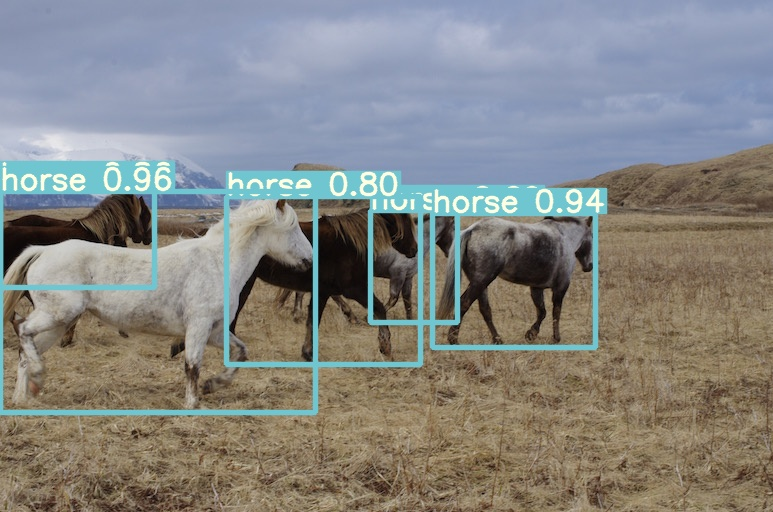

## 2.1 What is Object detection?
- A technology that identifies specific objects in images or videos and determines their locations.
- Used in fields such as autonomous vehicles, **Robotics**,  security systems, and medical image analysis.








## 2.2 Convolutional neural networks
- A structure designed for **image recognition**, primarily extracting and learning features from input data through **"Convolution layers"**.






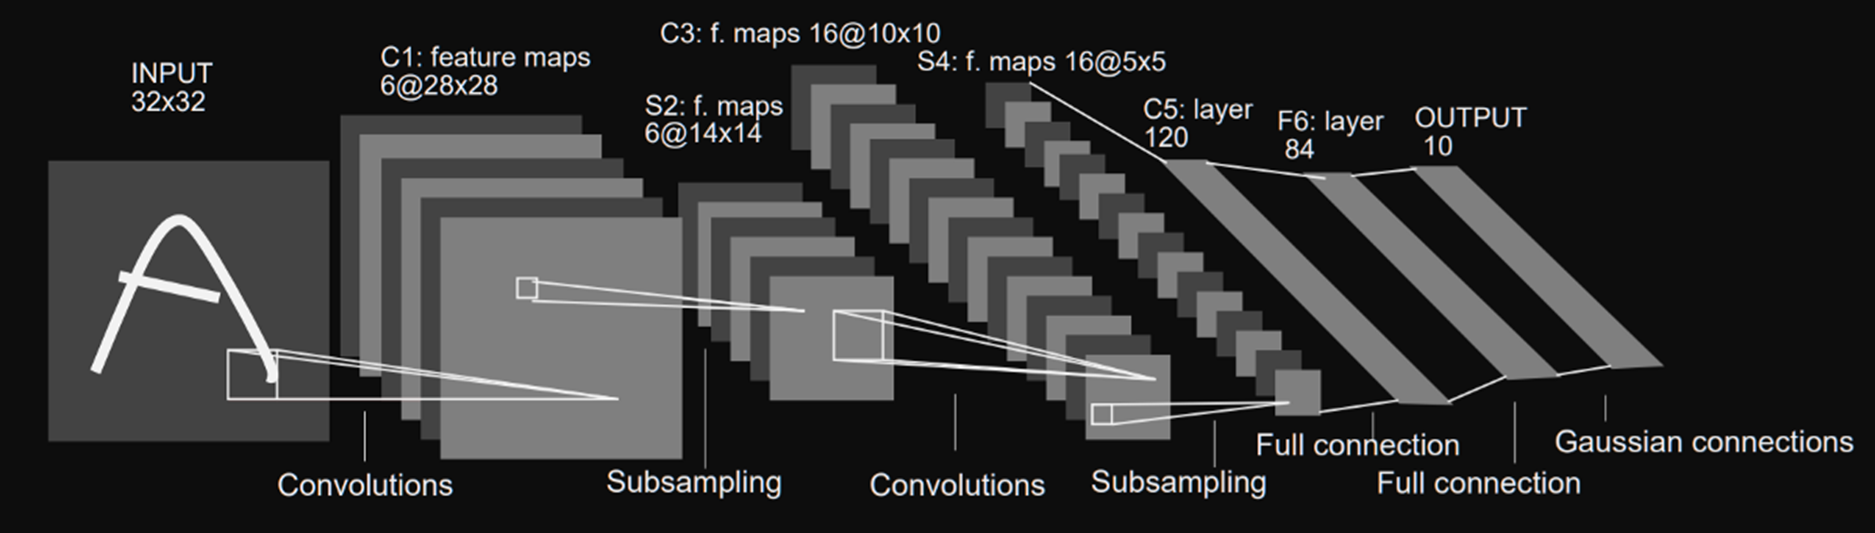


## 2.3 Object Detection Algorythm
- YOLO, SSD, Faster R-CNN

- YOLO
  - Input Image -> On the feature map, Performs object classification + coordinate detection simultaneously








  - YOLO (You only look once) https://arxiv.org/abs/1506.02640
  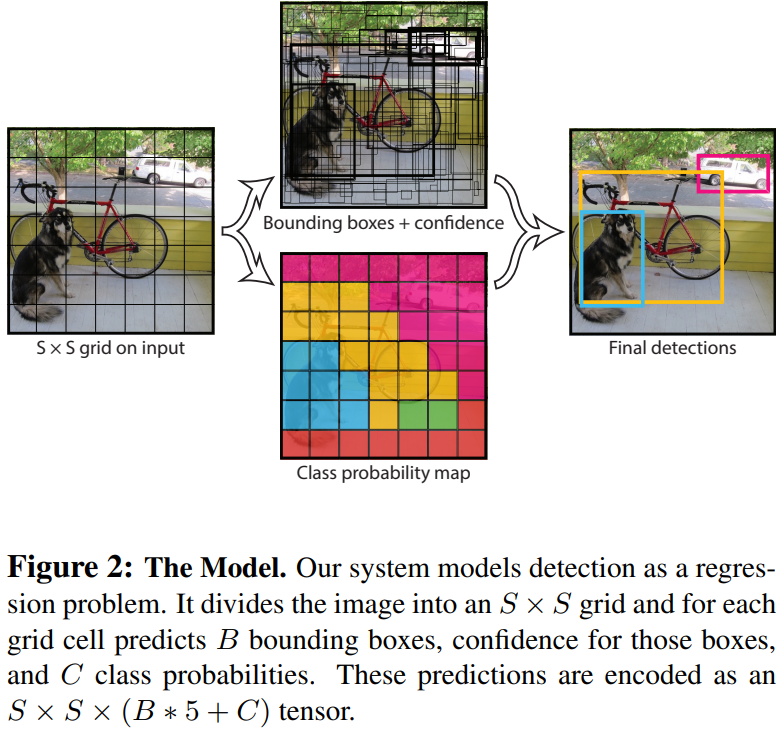
    - 입력 이미지를 7x7 featuremap까지 줄인 후 linear layer를 통해 객체 인식
  - YOLOv2 https://arxiv.org/abs/1612.08242
  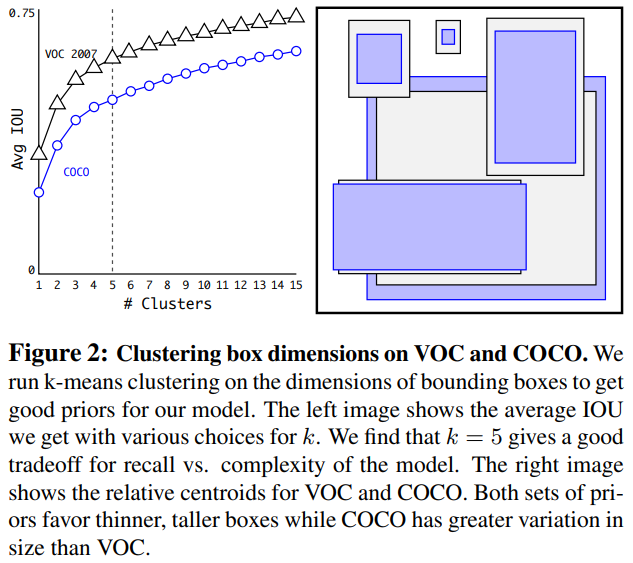
    - Batch notmalization 사용
    - 2개의 scale feature에서 anchorbox 기반의 객체 인식
  - YOLOv3  https://arxiv.org/abs/1804.02767
   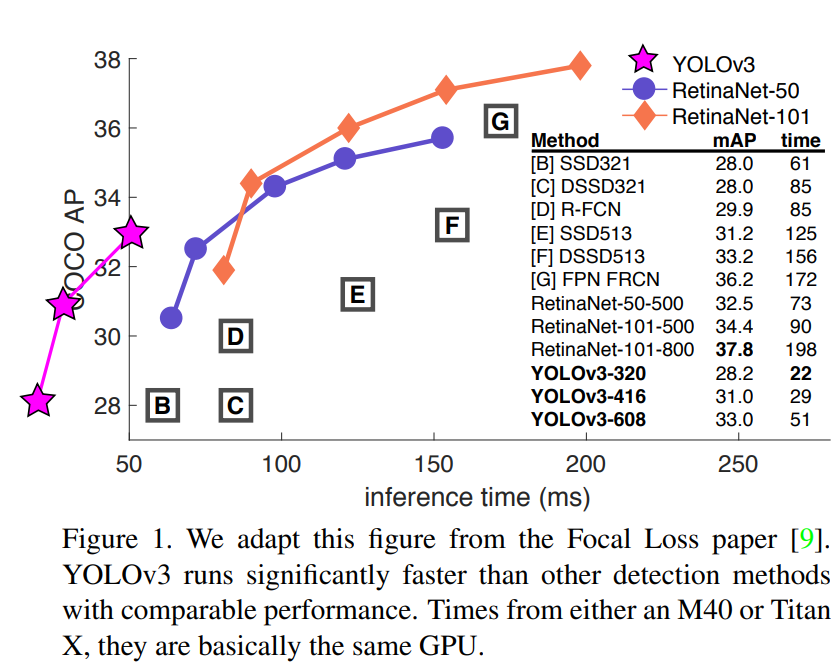
    - 3개의 scale feature를 사용
    - YOLO 원저자의 마지막 논문
  - YOLOv4 https://arxiv.org/abs/2004.10934
    - 기존 YOLO의 darknet repo를 최적화하던 사람이 발표한 논문
    - 훈련 시 성능 향상을 위한 기법
    - 추론 시 성능 향상을 위한 기법 적용
  - YOLOv5, YOLOv8, YOLOv10
    - ultralytics
  - YOLOv7, YOLOv9
    - WongKinYiu

- Faster R-CNN
  - Input the Imange first, and then at Feature map, Performs coordinate proposal.

    - Performs classification on the proposal and refines the coordinates.
  - R-CNN https://arxiv.org/abs/1311.2524
  - Fast R-CNN https://arxiv.org/abs/1504.08083
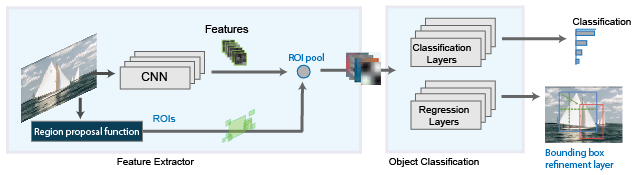

  - Faster R-CNN https://arxiv.org/abs/1506.01497
  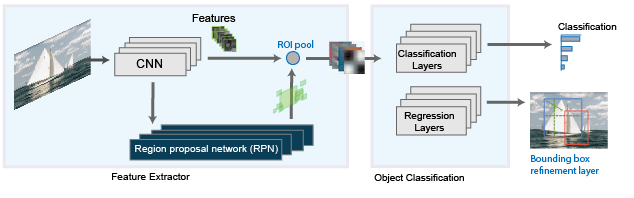
  

### Torchvision :  native pytorch Faster R-CNN Example
- Official Document
  - https://pytorch.org/vision/0.8/models.html#object-detection-instance-segmentation-and-person-keypoint-detection



In [ ]:
!wget https://raw.githubusercontent.com/JinFree/OpenCV_for_DeepLearning/3e8b5613ff76389b78d22c35b4e30678a887aca7/Data/image_01.png

--2024-06-29 06:24:14--  https://raw.githubusercontent.com/JinFree/OpenCV_for_DeepLearning/3e8b5613ff76389b78d22c35b4e30678a887aca7/Data/image_01.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 830401 (811K) [image/png]
Saving to: ‘image_01.png.2’

image_01.png.2      100%[===================>] 810.94K  --.-KB/s    in 0.008s  

2024-06-29 06:24:14 (103 MB/s) - ‘image_01.png.2’ saved [830401/830401]



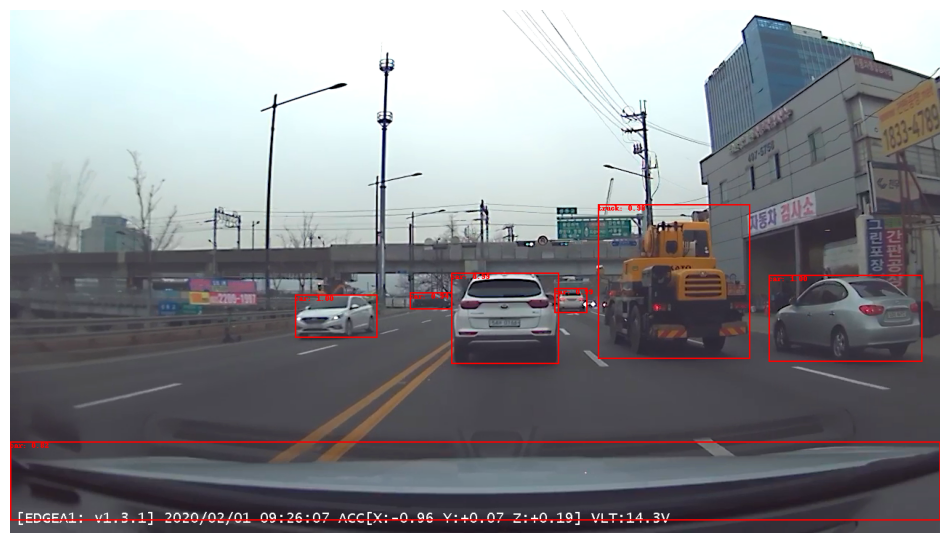

In [ ]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Transform function
transform = T.Compose([T.ToTensor()])

# Load a pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load the image
image_path = '/content/image_01.png'
image = Image.open(image_path)
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Perform object detection
with torch.no_grad():
    predictions = model(image_tensor)

# Convert predictions to numpy arrays and remove the batch dimension
labels = predictions[0]['labels'].numpy()
scores = predictions[0]['scores'].numpy()
boxes = predictions[0]['boxes'].detach().numpy()

# Draw bounding boxes and labels on the image
draw = ImageDraw.Draw(image)

# COCO class names
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A',
    'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Threshold for displaying predictions
threshold = 0.81

for i, box in enumerate(boxes):
    if scores[i] > threshold:
        draw.rectangle(box, outline="red", width=2)
        label = f"{COCO_INSTANCE_CATEGORY_NAMES[labels[i]]}: {scores[i]:.2f}"
        draw.text((box[0], box[1]), label, fill="red")

# Display the image with bounding boxes
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

"""
필요한 라이브러리(cv2, numpy, onnxruntime)를 임포트하고,
2. ONNX 모델 파일의 경로를 설정합니다.
3. ONNX 모델 파일을 로드하여 추론 세션을 만든 뒤,
4. 모델의 입력과 출력 텐서 이름을 가져옵니다.
5. 이미지를 로드하고, 6. RGB로 변환한 후 크기를 224x224로 조정하며,
7. 정규화하고 모델의 입력 형식에 맞게 변환하여 배치 차원을 추가합니다.
8. 준비된 입력 데이터를 모델에 전달하여 추론을 수행한 후,
9. 결과에서 바운딩 박스, 레이블, 점수를 추출하고,
10. COCO 클래스 이름을 정의한 다음, 일정 임계값 이상의 점수를 가진 객체들에 대해 바운딩 박스를 그리고 레이블을 추가한 뒤 결과 이미지를 저장합니다.
"""

### Torchvision Faster R-CNN -> onnx (Transforming)

In [ ]:
#R-CNN -> Region-based Convolutional Neural Network (R-CNN) is a type of deep learning architecture
#used for object detection in computer vision tasks.
!pip install onnx onnxruntime
import torch
import torchvision

# Load the pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Dummy input for the model
dummy_input = torch.randn(1, 3, 224, 224)

# Export the model to ONNX format
onnx_path = "faster_rcnn.onnx"
torch.onnx.export(
    model,                         # Model Obeject
    dummy_input,                   # dummy input data
    onnx_path,                     # ONNX file saving path
    opset_version=11,              # ONNX opset version
    input_names=["input"],         # Name of input Tensor
    output_names=["boxes", "labels", "scores"],  # Name of ouptut Tensor
    dynamic_axes={"input": {0: "batch_size"}, "boxes": {0: "batch_size"}, "labels": {0: "batch_size"}, "scores": {0: "batch_size"}},  # 가변 배치 사이즈를 위한 설정
)

print(f"Model has been converted to ONNX and saved at {onnx_path}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:4009: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  (torch.floor((input.size(i + 2).float() * torch.tensor(scale_factors[i], dtype=torch.float32)).float()))
/usr/local/lib/python3.10/dist-packages/torchvision/ops/boxes.py:166: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  boxes_x = torch.min(boxes_x, torch.tensor(width, dtype=boxes.dtype, device=boxes.device))
/usr/local/lib/python3.10/dist-packages/torchvision/ops/boxes.py:168: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bo

Model has been converted to ONNX and saved at faster_rcnn.onnx


### Onnx로 변환한 (변환된) Faster R-CNN 추론해보기

In [ ]:
import cv2
import numpy as np
import onnxruntime as ort

# ONNX model path
onnx_path = "faster_rcnn.onnx"

# ONNX model load
session = ort.InferenceSession(onnx_path)

# Bring the name of Input and Output
input_name = session.get_inputs()[0].name
output_names = [output.name for output in session.get_outputs()]

# Load the Image & preprocessing
image_path = '/content/image_01.png'
image = cv2.imread(image_path)
ori_h, ori_w = image.shape[:2]
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_resized = cv2.resize(image_rgb, (224, 224))
image_normalized = image_resized.astype(np.float32) / 255.0
image_transposed = np.transpose(image_normalized, (2, 0, 1))
input_tensor = np.expand_dims(image_transposed, axis=0)

# Model Inference 모델 추론
outputs = session.run(output_names, {input_name: input_tensor})

# Resultance
boxes, labels, scores = outputs
# boxes = boxes[0]
# labels = labels[0]
# scores = scores[0]

# Name of COCO class
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A',
    'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Threshold (임계값) setting
threshold = 0.8

# Drawing bounding box
for box, label, score in zip(boxes, labels, scores):
    if score > threshold:
        x1, y1, x2, y2 = box.astype(int)
        x1 = int(x1 * ori_w / 224.)
        x2 = int(x2 * ori_w / 224.)
        y1 = int(y1 * ori_h / 224.)
        y2 = int(y2 * ori_h / 224.)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label_text = f"{COCO_INSTANCE_CATEGORY_NAMES[label]}: {score:.2f}"
        cv2.putText(image, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

cv2.imwrite("faster_rcnn_onnx.jpg", image)

True

## Practice

- Refer to the official torchvision documentation and check the inference result of the /content/image_01.png image using **RetinaNet** instead of Faster R-CNN.

In [ ]:
# prompt:

import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
!pip install onnxruntime
import onnxruntime as ort

# ### Torchvision : Example of "native pytorch RetinaNet"
# - Offical Doc
#   - https://pytorch.org/vision/0.8/models.html#object-detection-instance-segmentation-and-person-keypoint-detection
#
#
!wget https://raw.githubusercontent.com/JinFree/OpenCV_for_DeepLearning/3e8b5613ff76389b78d22c35b4e30678a887aca7/Data/image_01.png

# Transform function
transform = T.Compose([T.ToTensor()])

# Load a pre-trained RetinaNet model
model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)
model.eval()

# Load the image
image_path = '/content/image_01.png'
image = Image.open(image_path)
image_tensor = transform(image)

# Perform object detection
with torch.no_grad():
    predictions = model(image_tensor)

# Draw bounding boxes and labels on the image
draw = ImageDraw.Draw(image)
labels = predictions[0]['labels'].numpy()
scores = predictions[0]['scores'].numpy()
boxes = predictions[0]['boxes'].detach().numpy()

# COCO class names
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A',
    'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Threshold for displaying predictions
threshold = 0.8

for i, box in enumerate(boxes):
    if scores[i] > threshold:
        draw.rectangle(box, outline="red", width=2)
        label = f"{COCO_INSTANCE_CATEGORY_NAMES[labels[i]]}: {scores[i]:.2f}"
        draw.text((box[0], box[1]), label, fill="red")

# Display the image with bounding boxes
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

# ### Torchvision RetinaNet을 onnx로 변환하기
#R-CNN -> Region-based Convolutional Neural Network (R-CNN) is a type of deep learning architecture
#used for object detection in computer vision tasks.
!pip install onnx onnxruntime

# Load the pre-trained RetinaNet model
model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)
model.eval()

# Dummy input for the model
dummy_input = torch.randn(1, 3, 224, 224)

# Export the model to ONNX format
onnx_path = "retinanet.onnx"
torch.onnx.export(
    model,                         # 모델 객체
    dummy_input,                   # 더미 입력 데이터
    onnx_path,                     # 저장할 ONNX 파일 경로
    opset_version=11,              # ONNX opset 버전
    input_names=["input"],         # 입력 텐서 이름
    output_names=["boxes", "labels", "scores"],  # 출력 텐서 이름
    dynamic_axes={"input": {0: "batch_size"}, "boxes": {0: "batch_size"}, "labels": {0: "batch_size"}, "scores": {0: "batch_size"}},  # 가변 배치 사이즈를 위한 설정
)

print(f"Model has been converted to ONNX and saved at {onnx_path}")
# ### Onnx로 변환한 RetinaNet 추론해보기

# ONNX modal path
onnx_path = "retinanet.onnx"

# ONNX model load
session = ort.InferenceSession(onnx_path)

# Bring the name of Input and Ouput
input_name = session.get_inputs()[0].name
output_names = [output.name for output in session.get_outputs()]

# Image load and preprocessing
image_path = '/content/image_01.png'
image = cv2.imread(image_path)
ori_h, ori_w = image.shape[:2]
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_resized = cv2.resize(image_rgb, (224, 224))
image_normalized = image_resized.astype(np.float32) / 255.0
image_transposed = np.transpose(image_normalized, (2, 0, 1))
input_tensor = np.expand_dims(image_transposed, axis=0)

# 모델 추론
outputs = session.run(output_names, {input_name: input_tensor})

# Result
boxes, labels, scores = outputs
# boxes = boxes[0]
# labels = labels[0]
# scores = scores[0]

# Name of COCO class
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A',
    'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# setting the value of Threshold
threshold = 0.8

# Drawing the bounding box
for box, label, score in zip(boxes, labels, scores):
    if score > threshold:
        x1, y1, x2, y2 = box.astype(int)
        x1 = int(x1 * ori_w / 224.)
        x2 = int(x2 * ori_w / 224.)
        y1 = int(y1 * ori_h / 224.)
        y2 = int(y2 * ori_h / 224.)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.7 MB/s eta 0:00:00
--2025-02-28 03:13:57--  https://raw.githubusercontent.com/JinFree/OpenCV_for_DeepLearning/3e8b5613ff76389b78d22c35b4e30678a887aca7/Data/image_01.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 830401 (811K) [image/png]
Saving to: ‘image_01.png’

image_01.png        100%[===================>] 810.94K  --.-KB/s    in 0.06s   

2025-02-28 03:13:58 (13.6 MB/s) - ‘image_01.png’ saved [830401/830401]



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth
100%|██████████| 130M/130M [00:01<00:00, 122MB/s]


ValueError: images is expected to be a list of 3d tensors of shape [C, H, W], got torch.Size([720, 1280])

- 위 코드를 참고하여 RetinaNet을 onnx로 변환하고 '/content/image_01.png' 이미지 추론 결과를 확인해보시오

--2025-02-28 03:48:33--  https://raw.githubusercontent.com/JinFree/OpenCV_for_DeepLearning/3e8b5613ff76389b78d22c35b4e30678a887aca7/Data/image_01.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 830401 (811K) [image/png]
Saving to: ‘/content/image_01.png’

/content/image_01.p 100%[===================>] 810.94K  --.-KB/s    in 0.06s   

2025-02-28 03:48:34 (13.9 MB/s) - ‘/content/image_01.png’ saved [830401/830401]



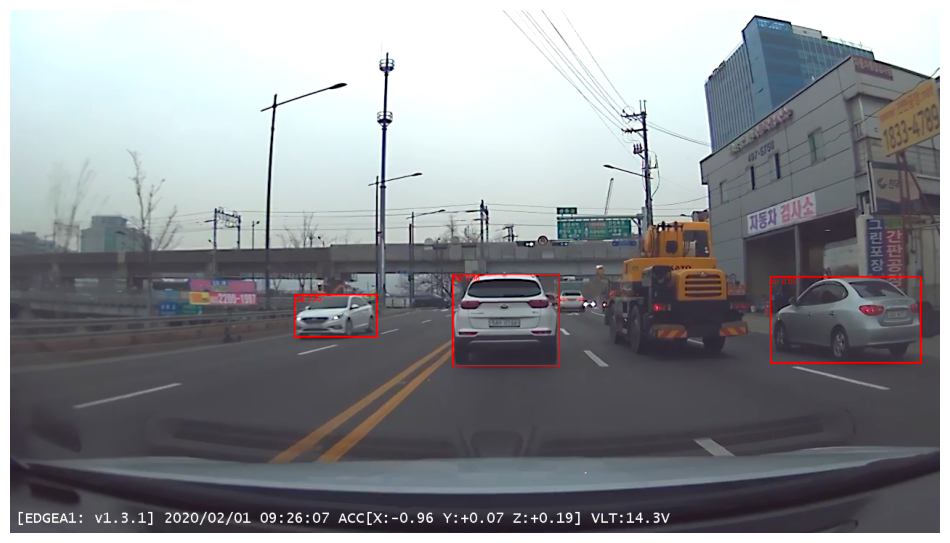

Model has been converted to ONNX and saved at retinanet.onnx


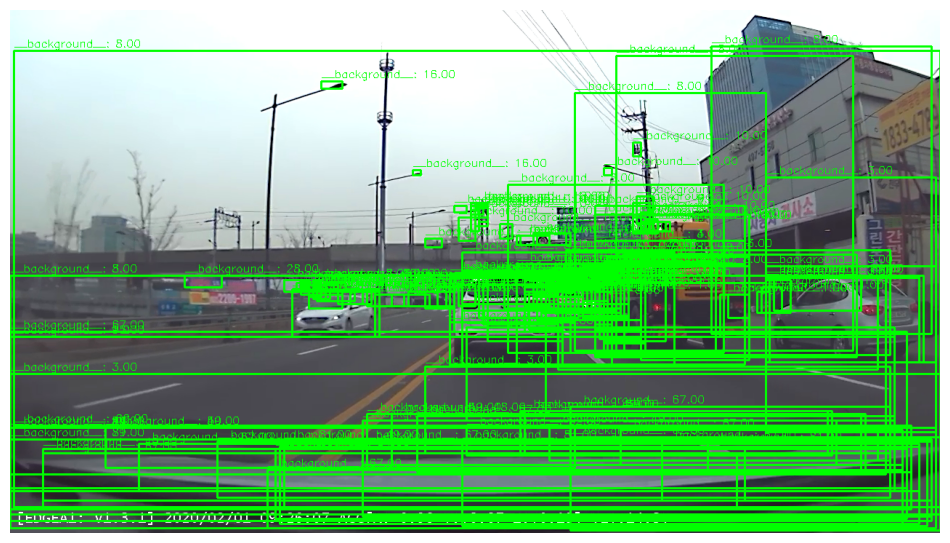

In [ ]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import cv2
import numpy as np
import onnxruntime as ort

# Install ONNX if not installed
!pip install onnx onnxruntime

# Download the image
!wget -O /content/image_01.png https://raw.githubusercontent.com/JinFree/OpenCV_for_DeepLearning/3e8b5613ff76389b78d22c35b4e30678a887aca7/Data/image_01.png

# Define the transformation function
transform = T.Compose([T.ToTensor()])

# Load the pre-trained RetinaNet model
model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)
model.eval()

# Load the image and convert it to RGB
image_path = '/content/image_01.png'
image = Image.open(image_path).convert("RGB")  # Ensure RGB format
image_tensor = transform(image)  # Convert image to tensor (C, H, W)

# RetinaNet expects a list of tensors [(C, H, W)]
image_tensor = [image_tensor]

# Perform object detection
with torch.no_grad():
    predictions = model(image_tensor)[0]  # Get the first batch result

# Extract detected objects
labels = predictions['labels'].numpy()
scores = predictions['scores'].numpy()
boxes = predictions['boxes'].detach().numpy()

# COCO class names
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A',
    'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Set threshold for displaying predictions
threshold = 0.8

# Draw bounding boxes and labels on the image
draw = ImageDraw.Draw(image)
for i, box in enumerate(boxes):
    if scores[i] > threshold:
        draw.rectangle(box.tolist(), outline="red", width=2)
        label = f"{COCO_INSTANCE_CATEGORY_NAMES[int(labels[i])]}: {scores[i]:.2f}"  # Fix: Convert label to int
        draw.text((box[0], box[1]), label, fill="red")

# Display the image with bounding boxes
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

# === Convert RetinaNet to ONNX ===
import onnx

# Create a dummy input for ONNX export
dummy_input = torch.randn(1, 3, 224, 224)

# Define the ONNX model path
onnx_path = "retinanet.onnx"

# Export the model to ONNX format
torch.onnx.export(
    model, dummy_input, onnx_path, opset_version=11,
    input_names=["input"],
    output_names=["boxes", "labels", "scores"],
    dynamic_axes={"input": {0: "batch_size"}, "boxes": {0: "batch_size"},
                  "labels": {0: "batch_size"}, "scores": {0: "batch_size"}}
)

print(f"Model has been converted to ONNX and saved at {onnx_path}")

# === Run inference using ONNX model ===

# Load the ONNX model
session = ort.InferenceSession(onnx_path)

# Get input and output names
input_name = session.get_inputs()[0].name
output_names = [output.name for output in session.get_outputs()]

# Load and preprocess the image for ONNX inference
image = cv2.imread(image_path)
ori_h, ori_w = image.shape[:2]
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_resized = cv2.resize(image_rgb, (224, 224))
image_normalized = image_resized.astype(np.float32) / 255.0
image_transposed = np.transpose(image_normalized, (2, 0, 1))
input_tensor = np.expand_dims(image_transposed, axis=0)

# Run inference
outputs = session.run(output_names, {input_name: input_tensor})

# Extract results
boxes, labels, scores = outputs[0], outputs[1], outputs[2]

# Set threshold for displaying predictions
threshold = 0.8

# Draw bounding boxes on the image
for box, label, score in zip(boxes, labels, scores):
    if score > threshold:
        x1, y1, x2, y2 = box.astype(int)
        x1 = int(x1 * ori_w / 224.)
        x2 = int(x2 * ori_w / 224.)
        y1 = int(y1 * ori_h / 224.)
        y2 = int(y2 * ori_h / 224.)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # 🔹 Fix: Convert label to int before indexing 🔹
        label_text = f"{COCO_INSTANCE_CATEGORY_NAMES[int(label)]}: {score:.2f}"

        cv2.putText(image, label_text, (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Display the final image with bounding boxes
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
